# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

In [ ]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

## 1.2 preprocessing of `project_subject_categories`

In [3]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [4]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Preprocessing of 'Teacher_prefix'

In [5]:
teacher_pre = []
for prefix in project_data['teacher_prefix'].values:
    if prefix==prefix:
        prefix = re.sub('[^A-Za-z0-9]','',prefix).lower()
        teacher_pre.append(prefix)
    else:
        teacher_pre.append(prefix)
    
project_data['teacher_prefix'] = teacher_pre

In [ ]:
project_data.teacher_prefix.unique()

## Preprocessing of project_grade_category

In [6]:
project_grade_cat = []
for grade in project_data['project_grade_category'].values:
    grade = grade.replace('-','_').lower()
    project_grade_cat.append(grade)
project_data['project_grade_category'] = project_grade_cat

In [ ]:
project_data.project_grade_category.unique()

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
project_data.head(2)

# Stratified Data Distribution(Train-Test-Cv )

In [8]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(project_data,project_data['project_is_approved'],test_size = 0.2, stratify = project_data['project_is_approved'])
X_train,X_cv,y_train,y_cv  = tts(X_train,y_train,test_size=0.2,stratify=y_train)

In [9]:
X_train.drop(['project_is_approved'],axis=1,inplace=True)
X_test.drop(['project_is_approved'],axis=1,inplace=True)
X_cv.drop(['project_is_approved'],axis=1,inplace=True)

# Saving data to csv files 

In [ ]:
y_train.to_csv('Y_train')
y_cv.to_csv('Y_cv')
y_test.to_csv('Y_test')
X_train.to_csv('X_train')
X_test.to_csv('X_test')
X_cv.to_csv('X_cv')

In [ ]:
X_train = pd.read_csv("X_train")
y_train = pd.read_csv("Y_train",names = ['Unnamed0: 1',"is_approved"] )
X_cv = pd.read_csv("X_cv")
y_cv = pd.read_csv("Y_cv",names = ['Unnamed0: 1',"is_approved"] )
X_test = pd.read_csv("X_test")
y_test = pd.read_csv("Y_test",names = ['Unnamed0: 1',"is_approved"] )

In [ ]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

In [11]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [12]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles_train =[]
for title in tqdm(X_train['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e not in stopwords)
        preprocessed_titles_train.append(des.lower().strip())        

100%|█████████████████████████████████████████████████████████████████████████| 69918/69918 [00:01<00:00, 36579.45it/s]


In [13]:
preprocessed_titles_test =[]
for title in tqdm(X_test['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e not in stopwords)
        preprocessed_titles_test.append(des.lower().strip()) 

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 33670.50it/s]


In [14]:
preprocessed_titles_cv =[]
for title in tqdm(X_cv['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e not in stopwords)
        preprocessed_titles_cv.append(des.lower().strip()) 

100%|█████████████████████████████████████████████████████████████████████████| 17480/17480 [00:00<00:00, 28451.07it/s]


In [ ]:
# after preprocesing
preprocessed_essays[20000]

<h2><font color='red'> 1.4 Preprocessing of `project_Essay`</font></h2>

In [15]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 69918/69918 [00:41<00:00, 1702.29it/s]


In [16]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:13<00:00, 1599.78it/s]


In [17]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 17480/17480 [00:10<00:00, 1675.14it/s]


## 1.5 Preparing data for models

In [ ]:
project_data.columns

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

# <h2><font color = 'red'> One hot encoding of categories column in train,test,and cv data<font/><h2/>

In [18]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of CV matrix after one hot encodig ",categories_one_hot_cv.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of Train matrix after one hot encodig  (69918, 9)
Shape of Test matrix after one hot encodig  (21850, 9)
Shape of CV matrix after one hot encodig  (17480, 9)


# <h2><font color = 'red'> One hot encoding of sub categories column in train,test,and cv data<font/><h2/>

In [19]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of CV matrix after one hot encodig ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of Train matrix after one hot encodig  (69918, 30)
Shape of Test matrix after one hot encodig  (21850, 30)
Shape of CV matrix after one hot encodig  (17480, 30)


# <h2><font color = 'red'> One hot encoding of teacher prefix column in train,test,and cv data<font/><h2/>

In [20]:
#https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer(vocabulary=list(filter(lambda v:v==v,project_data['teacher_prefix'].unique())),lowercase = False,binary = True)
vectorizer = vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ", prefix_one_hot_train.shape)
print("Shape of matrix after one hot encoding ", prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ", prefix_one_hot_test.shape)

['mrs', 'mr', 'ms', 'teacher', 'dr']
Shape of matrix after one hot encoding  (69918, 5)
Shape of matrix after one hot encoding  (17480, 5)
Shape of matrix after one hot encoding  (21850, 5)


# <h2><font color = 'red'> One hot encoding of project grade column in train,test,and cv data<font/><h2/>

In [21]:
vectorizer = CountVectorizer(vocabulary=list(filter(lambda v:v==v,project_data['project_grade_category'].unique())),lowercase = False,binary = True)
vectorizer = vectorizer.fit(X_train['project_grade_category'].values.astype('U'))
project_grade_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values.astype('U'))
project_grade_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values.astype('U'))
project_grade_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ", project_grade_one_hot_train.shape)
print("Shape of matrix after one hot encoding ", project_grade_one_hot_cv.shape)
print("Shape of matrix after one hot encoding ", project_grade_one_hot_test.shape)

['grades prek_2', 'grades 6_8', 'grades 3_5', 'grades 9_12']
Shape of matrix after one hot encoding  (69918, 4)
Shape of matrix after one hot encoding  (17480, 4)
Shape of matrix after one hot encoding  (21850, 4)


# <h2><font color = 'red'> One hot encoding of project grade column in train,test,and cv data<font/><h2/>

In [22]:
vectorizer = CountVectorizer(vocabulary=list(project_data['school_state'].unique()),lowercase = False,binary = True)
vectorizer.fit(X_train['school_state'].values)
state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
state_one_hot_test =  vectorizer.transform(X_test['school_state'].values)
state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encoding ", state_one_hot_train.shape)
print("Shape of Test matrix after one hot encoding ", state_one_hot_test.shape)
print("Shape of cv matrix after one hot encoding ", state_one_hot_cv.shape)

['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']
Shape of Train matrix after one hot encoding  (69918, 51)
Shape of Test matrix after one hot encoding  (21850, 51)
Shape of cv matrix after one hot encoding  (17480, 51)


### 1.5.2 Vectorizing Text data

# <font color = 'red'>Bag of words on Preprocessed Essay and Title <font/>

# Essay - vectorizing using BOW

In [23]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#training
vectorizer = CountVectorizer(min_df=10,max_features=5000)
essay_bow_train = vectorizer.fit_transform(preprocessed_essays_train[0:22445])
print("Shape of matrix after one hot encodig ",essay_bow_train.shape)

Shape of matrix after one hot encodig  (22445, 5000)


# CV - BOW

In [24]:
# validation
essay_bow_cv = vectorizer.transform(preprocessed_essays_cv[0:12000])
print("Shape of matrix after one hot encodig ",essay_bow_cv.shape)

Shape of matrix after one hot encodig  (12000, 5000)


# Test Data - BOW

In [25]:
#test
essay_bow_test = vectorizer.transform(preprocessed_essays_test[0:13000])
print("Shape of matrix after one hot encodig ",essay_bow_test.shape)

Shape of matrix after one hot encodig  (13000, 5000)


# Tiitle vectorizing using BOW

In [26]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#training
vectorizer = CountVectorizer(min_df=10,max_features=5000)
title_bow_train = vectorizer.fit_transform(preprocessed_titles_train[0:22445])
print("Shape of matrix after one hot encodig ",title_bow_train.shape)

Shape of matrix after one hot encodig  (22445, 1225)


# CV data - BOW

In [27]:
# validation
title_bow_cv = vectorizer.transform(preprocessed_titles_cv[0:12000])
print("Shape of matrix after one hot encodig ",title_bow_cv.shape)

Shape of matrix after one hot encodig  (12000, 1225)


# Test - BOW

In [28]:
#test
title_bow_test = vectorizer.transform(preprocessed_titles_test[0:13000])
print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (13000, 1225)


# <h2><font color = 'red'> Essay and title vectorizing using TFIDF<font/><h2/>
# <h2>Train data - TFIDF<h2/>
 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000)
essay_tfidf_train = vectorizer.fit_transform(preprocessed_essays_train[0:22445])
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)

Shape of matrix after one hot encodig  (22445, 5000)


# CV data - TFIDF

In [24]:
essay_tfidf_cv = vectorizer.transform(preprocessed_essays_cv[0:12000])
print("Shape of matrix after one hot encodig ",essay_tfidf_cv.shape)

Shape of matrix after one hot encodig  (12000, 5000)


# Test data - TFIDF

In [25]:
essay_tfidf_test = vectorizer.transform(preprocessed_essays_test[0:13000])
print("Shape of matrix after one hot encoding ",essay_tfidf_test.shape)

Shape of matrix after one hot encoding  (13000, 5000)


# Train Title - TFIDF

In [26]:
vectorizer = TfidfVectorizer(min_df = 10,max_features=5000)
title_tfidf_train = vectorizer.fit_transform(preprocessed_titles_train[0:22445])
print("Shape of matrix after one hot encding ",title_tfidf_train.shape)

Shape of matrix after one hot encding  (22445, 1206)


# CV Title - TFIDF

In [27]:
title_tfidf_cv = vectorizer.transform(preprocessed_titles_cv[0:12000])
print("Shape of matrix after one hot encding ",title_tfidf_cv.shape)

Shape of matrix after one hot encding  (12000, 1206)


# Test Title - TFIDF

In [28]:
title_tfidf_test = vectorizer.transform(preprocessed_titles_test[0:13000])
print("Shape of matrix after one hot encding ",title_tfidf_test.shape)

Shape of matrix after one hot encding  (13000, 1206)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# loading the glove_vectors file 

In [29]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# avg w2v vectors on Preprocessed Essays - Training data

In [24]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 69918/69918 [00:23<00:00, 2945.50it/s]


69918
300


# avg w2v vectors on Preprocessed Essays - CV data

In [25]:
avg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_cv.append(vector)

print(len(avg_w2v_vectors_essays_cv))
print(len(avg_w2v_vectors_essays_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 17480/17480 [00:05<00:00, 2963.81it/s]


17480
300


# avg w2v vectors on Preprocessed Essays - Test data

In [26]:
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:07<00:00, 2991.41it/s]


21850
300


# avg w2v vectors on Preprocessed Titles - Training data

In [27]:
#compute avg w2v for each title
avg_w2V_vectors_title_train =[]
for title in tqdm(preprocessed_titles_train):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_train.append(vector_title)
print(len(avg_w2V_vectors_title_train))
print(len(avg_w2V_vectors_title_train[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 69918/69918 [00:01<00:00, 55204.95it/s]


69918
300


# avg w2v vectors on Preprocessed Titles -CV data

In [28]:
#compute avg w2v for each title
avg_w2V_vectors_title_cv =[]
for title in tqdm(preprocessed_titles_cv):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_cv.append(vector_title)
print(len(avg_w2V_vectors_title_cv))
print(len(avg_w2V_vectors_title_cv[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 17480/17480 [00:00<00:00, 61713.91it/s]


17480
300


# avg w2v vectors on Preprocessed Titles - Test data

In [29]:
#compute avg w2v for each title
avg_w2V_vectors_title_test =[]
for title in tqdm(preprocessed_titles_test):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_test.append(vector_title)
print(len(avg_w2V_vectors_title_test))
print(len(avg_w2V_vectors_title_test[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 55324.44it/s]


21850
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [30]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf w2v vectors on Preprocessed Essay - Training data

In [31]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 69918/69918 [02:26<00:00, 475.68it/s]


69918
300


# tfidf w2v vectors on Preprocessed Essay - CV data

In [32]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 17480/17480 [00:36<00:00, 481.74it/s]


17480
300


# tfidf w2v vectors on Preprocessed Essay - Test data

In [33]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [00:46<00:00, 472.50it/s]


21850
300


In [34]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# tfidf w2v vectors on Preprocessed Titles - Training data

In [35]:
tfidf_w2v_vectors_title_train= []
for title in tqdm(preprocessed_titles_train):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)
print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 69918/69918 [00:02<00:00, 30615.60it/s]


69918
300


# tfidf w2v vectors on Preprocessed Titles - CV data

In [36]:
tfidf_w2v_vectors_title_cv= []
for title in tqdm(preprocessed_titles_cv):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)
print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 17480/17480 [00:00<00:00, 29828.18it/s]


17480
300


# tfidf w2v vectors on Preprocessed Titles - Test data

In [37]:
# Similarly you can vectorize for title also
tfidf_w2v_vectors_title_test= []
for title in tqdm(preprocessed_titles_test):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)
print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 31206.90it/s]


21850
300


### 1.5.3 Vectorizing Numerical features

In [38]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv,price_data, on ='id',how = 'left')
X_test = pd.merge(X_test,price_data, on ='id',how = 'left')

In [ ]:
X_train.to_csv("X_train")
X_cv.to_csv("X_cv")
X_test.to_csv("X_test")

# Price

In [39]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'][0:22445].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'][0:22445].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['price'][0:12000].values.reshape(-1,1))
price_standardized_test = price_scalar.transform(X_test['price'][0:13000].values.reshape(-1,1))


Mean : 299.7821033637781, Standard deviation : 375.416430866575


# Quantity

In [40]:
# standardized quantity columns 
quantity_scaler = StandardScaler()
quantity_scaler.fit(X_train['quantity'][0:22445].values.reshape(-1,1))
print(f"Mean :{quantity_scaler.mean_[0]},Standard Deviation :{np.sqrt(quantity_scaler.var_[0])}")
quantity_standardized_train = quantity_scaler.transform(X_train['quantity'][0:22445].values.reshape(-1,1))
quantity_standardized_cv = quantity_scaler.transform(X_cv['quantity'][0:12000].values.reshape(-1,1))
quantity_standardized_test = quantity_scaler.transform(X_test['quantity'][0:13000].values.reshape(-1,1))

Mean :16.905012252171975,Standard Deviation :25.76757628877424


# Teacher No. of Previously Posted Projects

In [41]:
#standardized projects proposed by teachers
project_scaler = StandardScaler()
project_scaler.fit(X_train['teacher_number_of_previously_posted_projects'][0:22445].values.reshape(-1,1))
print(f"Mean :{project_scaler.mean_[0]},Standard Deviation :{np.sqrt(project_scaler.var_[0])}")
project_standardized_train = project_scaler.transform(X_train['teacher_number_of_previously_posted_projects'][0:22445].values.reshape(-1,1))
project_standardized_cv = project_scaler.transform(X_cv['teacher_number_of_previously_posted_projects'][0:12000].values.reshape(-1,1))
project_standardized_test = project_scaler.transform(X_test['teacher_number_of_previously_posted_projects'][0:13000].values.reshape(-1,1))

Mean :11.171619514368457,Standard Deviation :28.13644073120739


# Project Grade Category

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)<font color='red'> SET 1</font>

In [54]:
# Please write all the code with proper documentation
from xgboost import XGBClassifier
import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:22445],sub_categories_one_hot_train[:22445],prefix_one_hot_train[:22445],
project_grade_one_hot_train[:22445],state_one_hot_train[:22445],sparse.csr_matrix(price_standardized_train[:22445]),
        sparse.csr_matrix(quantity_standardized_train[:22445]),sparse.csr_matrix(project_standardized_train[:22445]),essay_bow_train,title_bow_train)).tocsr()


X_crov = hstack((categories_one_hot_cv[:12000],sub_categories_one_hot_cv[:12000],prefix_one_hot_cv[:12000],
project_grade_one_hot_cv[:12000],sparse.csr_matrix(price_standardized_cv[:12000]),state_one_hot_cv[:12000],
        sparse.csr_matrix(quantity_standardized_cv[:12000]),sparse.csr_matrix(project_standardized_cv[:12000])
                 ,essay_bow_cv,title_bow_cv)).tocsr()

X_ts = hstack((categories_one_hot_test[:13000],sub_categories_one_hot_test[:13000],prefix_one_hot_test[:13000],
project_grade_one_hot_test[:13000],state_one_hot_test[:13000],sparse.csr_matrix(price_standardized_test[:13000]),
        sparse.csr_matrix(quantity_standardized_test[:13000]),sparse.csr_matrix(project_standardized_test[:13000]),essay_bow_test,title_bow_test)).tocsr()


In [44]:
# batch wise prediction
def proba_predict(model , data):
    y_pred_data = []
    n_loop = data.shape[0] - data.shape[0]%1000
    # here 1000 represents batch_size
    for i in range(0,n_loop,1000):
        y_pred_data.extend(model.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000!=0:
        y_pred_data.extend(model.predict_proba(data[n_loop:])[:,1])
    return(y_pred_data)


# Finding best value of K in KNN using Randomized Search CV

In [47]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,auc

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [15:58<00:00, 90.65s/it]


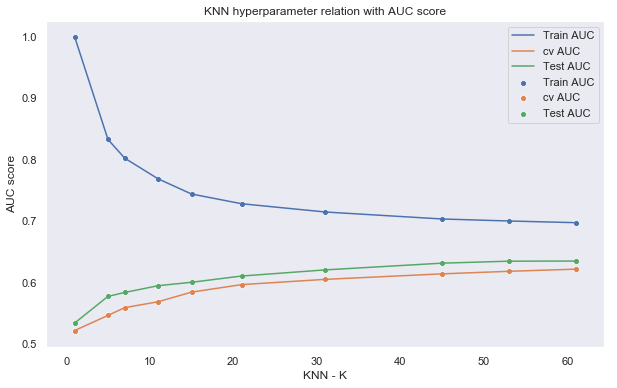

In [57]:
n_neighbors = [1,5,7,11,15,21,31,45,53,61]
train_auc = []
test_auc = []
cv_auc = []
for k in tqdm(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='uniform')
    model.fit(X_tr,y_train[:22445])
    y_train_prob_pred = proba_predict(model,X_tr)
    y_cv_prob_pred = proba_predict(model,X_crov)
    y_test_prob_pred = proba_predict(model,X_ts)
    train_auc.append(roc_auc_score(y_train[:22445],y_train_prob_pred))
    test_auc.append(roc_auc_score(y_test[:13000],y_test_prob_pred))
    cv_auc.append(roc_auc_score(y_cv[:12000],y_cv_prob_pred))
    
sns.set()    
plt.figure(figsize=(10,6))    
sns.scatterplot(n_neighbors,train_auc,label = "Train AUC")
sns.scatterplot(n_neighbors,cv_auc,label = "cv AUC")
sns.scatterplot(n_neighbors,test_auc,label = "Test AUC")
sns.lineplot(n_neighbors,train_auc,label = "Train AUC")
sns.lineplot(n_neighbors,cv_auc,label = "cv AUC")
sns.lineplot(n_neighbors,test_auc,label = "Test AUC")
plt.legend()
plt.title("KNN hyperparameter relation with AUC score")
plt.xlabel("KNN - K")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# Fitting the Best Estimator and Calibrating The Data 

In [59]:
best_k = n_neighbors[np.argmax(test_auc)]
model = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1,weights='uniform')
model.fit(X_tr,y_train[:22445])
y_train_prob_pred = proba_predict(model,X_tr)
y_cv_prob_pred = proba_predict(model,X_crov)
y_test_prob_pred = proba_predict(model,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000],y_test_prob_pred)

# ROC_AUC CURVE

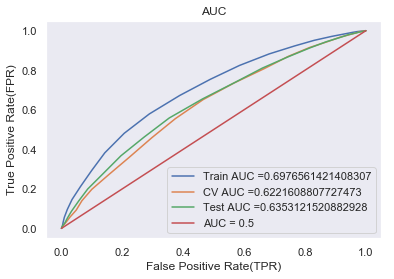

In [60]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [45]:
def pred_using_threshold(proba,thresh,tpr,fpr):
    flag = thresh[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(flag,3))
    pred_auc = []
    for i in proba:
        if i>=flag:
            pred_auc.append(1)
        else:
            pred_auc.append(0)
    return pred_auc

# Confusion Matrix on training data

the maximum value of tpr*(1-fpr) 0.41174062580063675 for threshold 0.803


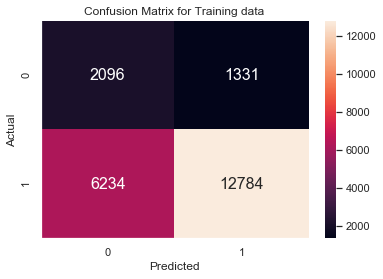

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

#  Confusion Matrix on Test Data

the maximum value of tpr*(1-fpr) 0.3606780226582652 for threshold 0.803


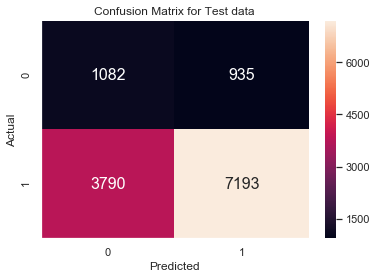

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:13000],pred_using_threshold(y_test_prob_pred,thres_test,tpr_test,fpr_test)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Test data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [64]:
# Please write all the code with proper documentation
from xgboost import XGBClassifier
import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:22445],sub_categories_one_hot_train[:22445],prefix_one_hot_train[:22445],
project_grade_one_hot_train[:22445],state_one_hot_train[:22445],sparse.csr_matrix(price_standardized_train[:22445]),
        sparse.csr_matrix(quantity_standardized_train[:22445]),sparse.csr_matrix(project_standardized_train[:22445]),essay_tfidf_train,title_tfidf_train)).tocsr()



X_crov = hstack((categories_one_hot_cv[:12000],sub_categories_one_hot_cv[:12000],prefix_one_hot_cv[:12000],
project_grade_one_hot_cv[:12000],sparse.csr_matrix(price_standardized_cv[:12000]),state_one_hot_cv[:12000],
        sparse.csr_matrix(quantity_standardized_cv[:12000]),sparse.csr_matrix(project_standardized_cv[:12000]),essay_tfidf_cv,title_tfidf_cv)).tocsr()

X_ts =  hstack((categories_one_hot_test[:13000],sub_categories_one_hot_test[:13000],prefix_one_hot_test[:13000],
project_grade_one_hot_test[:13000],state_one_hot_test[:13000],sparse.csr_matrix(price_standardized_test[:13000]),
        sparse.csr_matrix(quantity_standardized_test[:13000]),sparse.csr_matrix(project_standardized_test[:13000]),essay_tfidf_test,title_tfidf_test)).tocsr()


# Finding best value of K in KNN using Randomized Search CV

In [65]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [14:48<00:00, 93.57s/it]


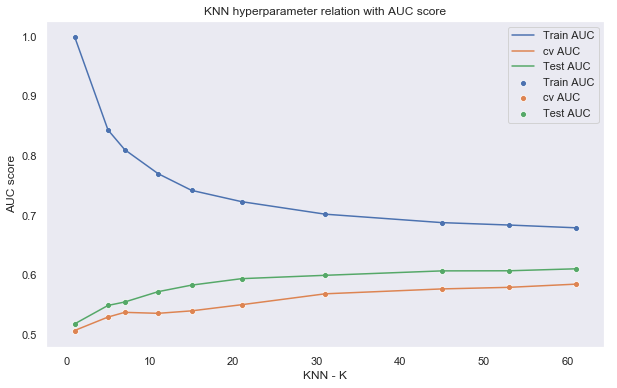

In [66]:
n_neighbors = [1,5,7,11,15,21,31,45,53,61]
train_auc = []
test_auc = []
cv_auc = []
for k in tqdm(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='uniform')
    model.fit(X_tr,y_train[:22445])
    y_train_prob_pred = proba_predict(model,X_tr)
    y_cv_prob_pred = proba_predict(model,X_crov)
    y_test_prob_pred = proba_predict(model,X_ts)
    train_auc.append(roc_auc_score(y_train[:22445],y_train_prob_pred))
    test_auc.append(roc_auc_score(y_test[:13000],y_test_prob_pred))
    cv_auc.append(roc_auc_score(y_cv[:12000],y_cv_prob_pred))
    
sns.set()    
plt.figure(figsize=(10,6))    
sns.scatterplot(n_neighbors,train_auc,label = "Train AUC")
sns.scatterplot(n_neighbors,cv_auc,label = "cv AUC")
sns.scatterplot(n_neighbors,test_auc,label = "Test AUC")
sns.lineplot(n_neighbors,train_auc,label = "Train AUC")
sns.lineplot(n_neighbors,cv_auc,label = "cv AUC")
sns.lineplot(n_neighbors,test_auc,label = "Test AUC")
plt.legend()
plt.title("KNN hyperparameter relation with AUC score")
plt.xlabel("KNN - K")
plt.ylabel("AUC score")
plt.grid()
plt.show()

In [68]:
best_k = n_neighbors[np.argmax(test_auc)]
best_k

61

# Fitting the Best Estimator and Calibrating The Data 

In [67]:
best_k = n_neighbors[np.argmax(test_auc)]
model = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1,weights='uniform')
model.fit(X_tr,y_train[:22445])
y_train_prob_pred = proba_predict(model,X_tr)
y_cv_prob_pred = proba_predict(model,X_crov)
y_test_prob_pred = proba_predict(model,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000],y_test_prob_pred)

# ROC_AUC CURVE

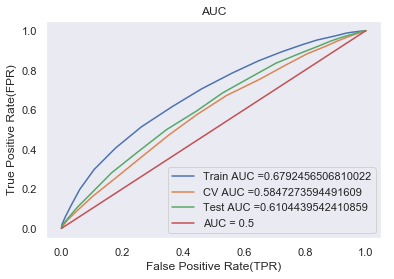

In [69]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix on training data

the maximum value of tpr*(1-fpr) 0.3917496434121677 for threshold 0.852


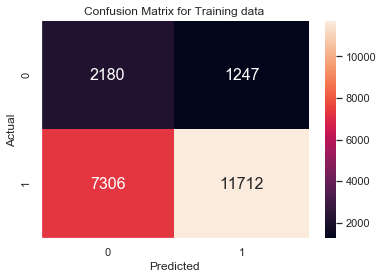

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

#  Confusion Matrix on Test Data

the maximum value of tpr*(1-fpr) 0.33017710563731906 for threshold 0.852


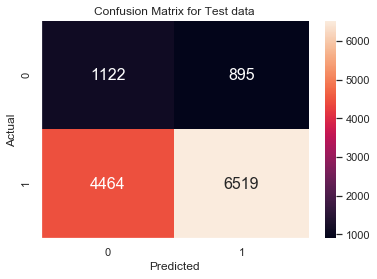

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:13000],pred_using_threshold(y_test_prob_pred,thres_test,tpr_test,fpr_test)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Test data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [43]:
# Please write all the code with proper documentation
from xgboost import XGBClassifier
import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:22445],sub_categories_one_hot_train[:22445],prefix_one_hot_train[:22445],
project_grade_one_hot_train[:22445],state_one_hot_train[:22445],sparse.csr_matrix(price_standardized_train[:22445]),
        sparse.csr_matrix(quantity_standardized_train[:22445]),sparse.csr_matrix(project_standardized_train[:22445]),
               avg_w2V_vectors_title_train[:22445],avg_w2v_vectors_essays_train[:22445])).tocsr()





In [44]:
X_crov = hstack((categories_one_hot_cv[:12000],sub_categories_one_hot_cv[:12000],prefix_one_hot_cv[:12000],
project_grade_one_hot_cv[:12000],sparse.csr_matrix(price_standardized_cv[:12000]),state_one_hot_cv[:12000],
        sparse.csr_matrix(quantity_standardized_cv[:12000]),sparse.csr_matrix(project_standardized_cv[:12000])
                 ,avg_w2V_vectors_title_cv[:12000],avg_w2v_vectors_essays_cv[:12000])).tocsr()


In [45]:
X_ts =  hstack((categories_one_hot_test[:13000],sub_categories_one_hot_test[:13000],prefix_one_hot_test[:13000],
project_grade_one_hot_test[:13000],state_one_hot_test[:13000],sparse.csr_matrix(price_standardized_test[:13000]),
        sparse.csr_matrix(quantity_standardized_test[:13000]),sparse.csr_matrix(project_standardized_test[:13000]),
               avg_w2V_vectors_title_test[:13000],avg_w2v_vectors_essays_test[:13000])).tocsr()


In [50]:
X_tr.toarray()

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.79095290e-01,  5.38712443e-02, -2.71727717e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.28777516e-01,  1.21617663e-01,  2.33531094e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.48975022e-01,  9.27431436e-02, -6.37721928e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.11825992e-01,  5.27838756e-02, -7.12467006e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.64134156e-02,  6.98729461e-02,  4.20000982e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.18939147e-01,  1.32633531e-01, -3.33437768e-04]])

# Finding best value of K in KNN using Randomized Search CV

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [2:07:37<00:00, 768.94s/it]


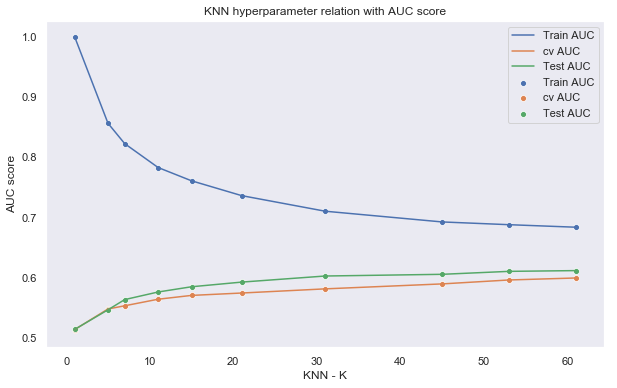

In [49]:
n_neighbors = [1,5,7,11,15,21,31,45,53,61]
train_auc = []
test_auc = []
cv_auc = []
for k in tqdm(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='uniform')
    model.fit(X_tr,y_train[:22445])
    y_train_prob_pred = proba_predict(model,X_tr)
    y_cv_prob_pred = proba_predict(model,X_crov)
    y_test_prob_pred = proba_predict(model,X_ts)
    train_auc.append(roc_auc_score(y_train[:22445],y_train_prob_pred))
    test_auc.append(roc_auc_score(y_test[:13000],y_test_prob_pred))
    cv_auc.append(roc_auc_score(y_cv[:12000],y_cv_prob_pred))
    
sns.set()    
plt.figure(figsize=(10,6))    
sns.scatterplot(n_neighbors,train_auc,label = "Train AUC")
sns.scatterplot(n_neighbors,cv_auc,label = "cv AUC")
sns.scatterplot(n_neighbors,test_auc,label = "Test AUC")
sns.lineplot(n_neighbors,train_auc,label = "Train AUC")
sns.lineplot(n_neighbors,cv_auc,label = "cv AUC")
sns.lineplot(n_neighbors,test_auc,label = "Test AUC")
plt.legend()
plt.title("KNN hyperparameter relation with AUC score")
plt.xlabel("KNN - K")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# Fitting the Best Estimator and Calibrating The Data 

In [50]:
best_k = n_neighbors[np.argmax(test_auc)]
print(best_k)
model = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1,weights='uniform')
model.fit(X_tr,y_train[:22445])
y_train_prob_pred = proba_predict(model,X_tr)
y_cv_prob_pred = proba_predict(model,X_crov)
y_test_prob_pred = proba_predict(model,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000],y_test_prob_pred)

61


# ROC_AUC CURVE

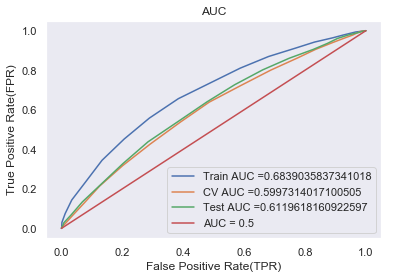

In [51]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix on training data

the maximum value of tpr*(1-fpr) 0.40418750814416154 for threshold 0.852


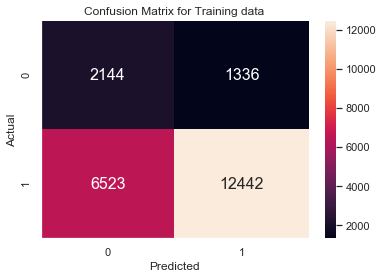

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

#  Confusion Matrix on Test Data

the maximum value of tpr*(1-fpr) 0.33394851881824617 for threshold 0.869


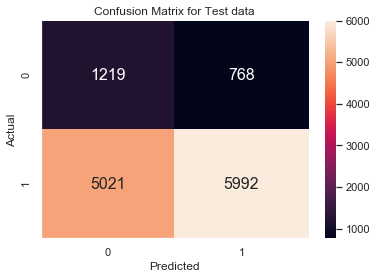

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:13000],pred_using_threshold(y_test_prob_pred,thres_test,tpr_test,fpr_test)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Test data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

## categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V),<font color='red'> SET 4</font>

In [51]:
# Please write all the code with proper documentation
from xgboost import XGBClassifier
import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:22445],sub_categories_one_hot_train[:22445],prefix_one_hot_train[:22445],
project_grade_one_hot_train[:22445],state_one_hot_train[:22445],sparse.csr_matrix(price_standardized_train[:22445]),
        sparse.csr_matrix(quantity_standardized_train[:22445]),sparse.csr_matrix(project_standardized_train[:22445]),
               tfidf_w2v_vectors_title_train[:22445],tfidf_w2v_vectors[:22445])).tocsr()


X_crov = hstack((categories_one_hot_cv[:12000],sub_categories_one_hot_cv[:12000],prefix_one_hot_cv[:12000],
project_grade_one_hot_cv[:12000],sparse.csr_matrix(price_standardized_cv[:12000]),state_one_hot_cv[:12000],
        sparse.csr_matrix(quantity_standardized_cv[:12000]),sparse.csr_matrix(project_standardized_cv[:12000])
                 ,tfidf_w2v_vectors_title_cv[:12000],tfidf_w2v_vectors_cv[:12000])).tocsr()

X_ts =  hstack((categories_one_hot_test[:13000],sub_categories_one_hot_test[:13000],prefix_one_hot_test[:13000],
project_grade_one_hot_test[:13000],state_one_hot_test[:13000],sparse.csr_matrix(price_standardized_test[:13000]),
        sparse.csr_matrix(quantity_standardized_test[:13000]),sparse.csr_matrix(project_standardized_test[:13000]),
               tfidf_w2v_vectors_title_test[:13000],tfidf_w2v_vectors_test[:13000])).tocsr()


# Finding best value of K in KNN using Randomized Search CV

In [43]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,f1_score

In [ ]:
n_neighbors = [1,5,7,11,15,21,31,45,53,61]
train_auc = []
test_auc = []
cv_auc = []
for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='uniform')
    model.fit(X_tr,y_train[:22445])
    y_train_prob_pred = proba_predict(model,X_tr)
    y_cv_prob_pred = proba_predict(model,X_crov)
    y_test_prob_pred = proba_predict(model,X_ts)
    train_auc.append(roc_auc_score(y_train[:22445],y_train_prob_pred))
    test_auc.append(roc_auc_score(y_test[:13000],y_test_prob_pred))
     cv_auc.append(roc_auc_score(y_cv[:12000],y_cv_prob_pred))
    
sns.set()    
plt.figure(figsize=(10,6))    
sns.scatterplot(n_neighbors,train_auc,label = "Train AUC")
sns.scatterplot(n_neighbors,cv_auc,label = "cv AUC")
sns.scatterplot(n_neighbors,test_auc,label = "Test AUC")
sns.lineplot(n_neighbors,train_auc,label = "Train AUC")
sns.lineplot(n_neighbors,cv_auc,label = "cv AUC")
sns.lineplot(n_neighbors,test_auc,label = "Test AUC")
plt.legend()
plt.title("KNN hyperparameter relation with AUC score")
plt.xlabel("KNN - K")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# Fitting the Best Estimator and Calibrating The Data 

In [46]:
best_k = 61
print(best_k)
model = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1,weights='uniform')
model.fit(X_tr,y_train[:22445])
y_train_prob_pred = proba_predict(model,X_tr)
y_cv_prob_pred = proba_predict(model,X_crov)
y_test_prob_pred = proba_predict(model,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000],y_test_prob_pred)

61


# ROC_AUC CURVE

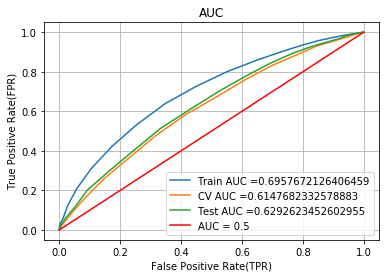

In [47]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix on training data

the maximum value of tpr*(1-fpr) 0.41661988564639485 for threshold 0.852


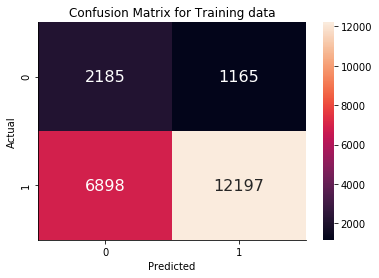

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

#  Confusion Matrix on Test Data

the maximum value of tpr*(1-fpr) 0.34776408809632314 for threshold 0.852


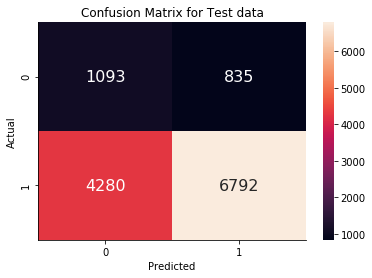

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:13000],pred_using_threshold(y_test_prob_pred,thres_test,tpr_test,fpr_test)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Test data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [53]:
# Please write all the code with proper documentation
from xgboost import XGBClassifier
import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train[:22445],sub_categories_one_hot_train[:22445],prefix_one_hot_train[:22445],
project_grade_one_hot_train[:22445],state_one_hot_train[:22445],sparse.csr_matrix(price_standardized_train[:22445]),
        sparse.csr_matrix(quantity_standardized_train[:22445]),sparse.csr_matrix(project_standardized_train[:22445]),essay_tfidf_train,title_tfidf_train)).tocsr()



X_crov = hstack((categories_one_hot_cv[:12000],sub_categories_one_hot_cv[:12000],prefix_one_hot_cv[:12000],
project_grade_one_hot_cv[:12000],sparse.csr_matrix(price_standardized_cv[:12000]),state_one_hot_cv[:12000],
        sparse.csr_matrix(quantity_standardized_cv[:12000]),sparse.csr_matrix(project_standardized_cv[:12000]),essay_tfidf_cv,title_tfidf_cv)).tocsr()

X_ts =  hstack((categories_one_hot_test[:13000],sub_categories_one_hot_test[:13000],prefix_one_hot_test[:13000],
project_grade_one_hot_test[:13000],state_one_hot_test[:13000],sparse.csr_matrix(price_standardized_test[:13000]),
        sparse.csr_matrix(quantity_standardized_test[:13000]),sparse.csr_matrix(project_standardized_test[:13000]),essay_tfidf_test,title_tfidf_test)).tocsr()


In [56]:
y_test[:13000].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Finding best value of K in KNN using Randomized Search CV

In [61]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif
# I have used f_classif (f-anova )instead of chi2(chi square or goodness of fit)
# because chi2 won't work in negative values 
#https://stackoverflow.com/questions/25792012/feature-selection-using-scikit-learn  -- this will help
vect = SelectKBest(f_classif,k=2000).fit(X_tr,y_train[:22445])

## Model on Top 2000 features using  F- ANOVA

In [63]:
X_tr_new = vect.transform(X_tr)
X_ts_new = vect.transform(X_ts)
X_crov_new = vect.transform(X_crov)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [12:41<00:00, 74.87s/it]


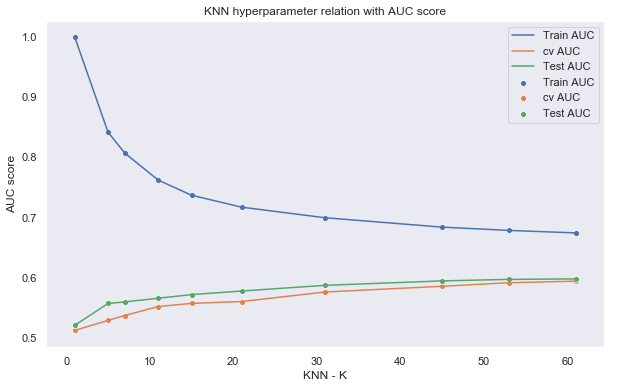

In [64]:
n_neighbors = [1,5,7,11,15,21,31,45,53,61]
train_auc = []
test_auc = []
cv_auc = []
for k in tqdm(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='uniform')
    model.fit(X_tr_new,y_train[:22445])
    y_train_prob_pred = proba_predict(model,X_tr_new)
    y_cv_prob_pred = proba_predict(model,X_crov_new)
    y_test_prob_pred = proba_predict(model,X_ts_new)
    train_auc.append(roc_auc_score(y_train[:22445],y_train_prob_pred))
    test_auc.append(roc_auc_score(y_test[:13000],y_test_prob_pred))
    cv_auc.append(roc_auc_score(y_cv[:12000],y_cv_prob_pred))
    
sns.set()    
plt.figure(figsize=(10,6))    
sns.scatterplot(n_neighbors,train_auc,label = "Train AUC")
sns.scatterplot(n_neighbors,cv_auc,label = "cv AUC")
sns.scatterplot(n_neighbors,test_auc,label = "Test AUC")
sns.lineplot(n_neighbors,train_auc,label = "Train AUC")
sns.lineplot(n_neighbors,cv_auc,label = "cv AUC")
sns.lineplot(n_neighbors,test_auc,label = "Test AUC")
plt.legend()
plt.title("KNN hyperparameter relation with AUC score")
plt.xlabel("KNN - K")
plt.ylabel("AUC score")
plt.grid()
plt.show()

# Fitting the Best Estimator and Calibrating The Data 

In [65]:
best_k = n_neighbors[np.argmax(test_auc)]
print(best_k)
model = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1,weights='uniform')
model.fit(X_tr_new,y_train[:22445])
y_train_prob_pred = proba_predict(model,X_tr_new)
y_cv_prob_pred = proba_predict(model,X_crov_new)
y_test_prob_pred = proba_predict(model,X_ts_new)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000],y_test_prob_pred)

61


# ROC_AUC CURVE

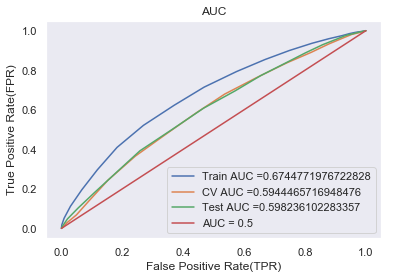

In [66]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix on training data

the maximum value of tpr*(1-fpr) 0.39217197594118963 for threshold 0.852


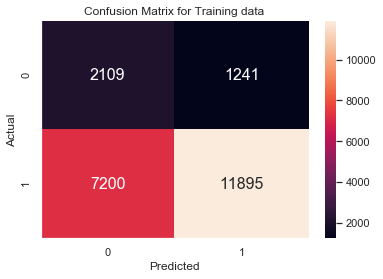

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

#  Confusion Matrix on Test Data

the maximum value of tpr*(1-fpr) 0.32414520273187347 for threshold 0.852


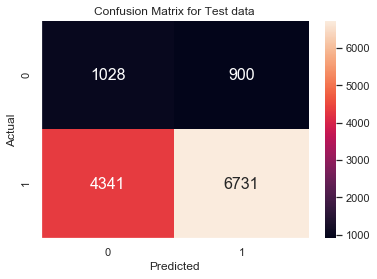

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test[:13000],pred_using_threshold(y_test_prob_pred,thres_test,tpr_test,fpr_test)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Test data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

<h1>3. Conclusions</h1>

In [69]:
# Compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", "KNN", 61, 0.635])
x.add_row(["TFIDF", "KNN", 61, 0.610])
x.add_row(["AVG W2V", "KNN", 61, 0.611])
x.add_row(["TFIDF W2V", "KNN", 61, 0.629])
x.add_row(["TFIDF", "KNN-Top 2000", 61, 0.598])

print(x)

+------------+--------------+-----------------+-------+
| Vectorizer |    Model     | Hyper Parameter |  AUC  |
+------------+--------------+-----------------+-------+
|    BOW     |     KNN      |        61       | 0.635 |
|   TFIDF    |     KNN      |        61       |  0.61 |
|  AVG W2V   |     KNN      |        61       | 0.611 |
| TFIDF W2V  |     KNN      |        61       | 0.629 |
|   TFIDF    | KNN-Top 2000 |        61       | 0.598 |
+------------+--------------+-----------------+-------+
